In [53]:
import os
import numpy as np
import pandas as pd
import scipy
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
import cv2
from skimage import io
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [54]:
seed = 410
rng = np.random.RandomState(seed)

In [55]:
rose_training_images = os.listdir("train/rose")
sunflower_training_images = os.listdir("train/sunflower")
training_rosepath = "train/rose/"
training_sfpath = "train/sunflower/"

In [56]:
# Data Preprocessing Method 1

training_images = []
training_label = []

# training data
for rose in rose_training_images:
    if rose.startswith('rose'):
        training_image = scipy.misc.imread(training_rosepath+rose)
        training_images.append(training_image)
        training_label.append(0) #for sunflower training images

for sunflower in sunflower_training_images:
    if sunflower.startswith('sunflower'):
        training_image = scipy.misc.imread(training_sfpath+sunflower)
        training_images.append(training_image)
        training_label.append(1) #for sunflower training images

In [58]:
for i in range(len(training_images)):
    training_images[i]=cv2.resize(training_images[i],(100,100))
      
training_images=np.array(training_images)
training_label=np.array(training_label)

training_label = to_categorical(training_label)

In [64]:
filters=25
filtersize1=(5,5)
filtersize2=(4,4)
epochs =7
batchsize=128
input_shape=(100,100,3)
hidden_num_units = 50

In [62]:
training_image_temp = training_images.reshape(-1, 100, 100, 3)   # requires 4 dimensions
## 3 is for RGB photo, if it's gray photo (1 color), set as 1

In [66]:
model = Sequential()

model.add(keras.layers.InputLayer(input_shape=input_shape))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize1, strides=(1, 1), 
                                            padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=2, input_dim=55,activation='softmax'))   # 2 indicates 2 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_image_temp, training_label, epochs=epochs, batch_size=batchsize,validation_split=0.3)

model.summary()

Train on 77 samples, validate on 33 samples
Epoch 1/7
77/77 [==============================] - 1s - loss: 9.4806 - acc: 0.3506 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/7
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/7
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/7
77/77 [==============================] - 0s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/7
77/77 [==============================] - 0s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/7
77/77 [==============================] - 0s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/7
77/77 [==============================] - 0s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
_________________________________________________________________
Layer (type)   

10/10 [==============================] - 0s
Predicted as Rose


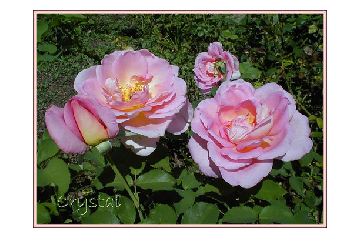

In [104]:
# Predict with CNN trained model

testing_images_temp = testing_images.reshape(-1, 100, 100, 3)
pred = model.predict_classes(testing_images_temp)

testing_images = os.listdir("test/flower")
testing_path = "test/flower/"

img_name = rng.choice(testing_images)    # random choose a file name
testing_image_path = testing_path + img_name
testing_img = scipy.misc.imread(testing_image_path)  # without flatten keyword, we can show color photo below

test_index = int(img_name.split('.')[0])
if pred[test_index] == 0:
    print "Predicted as Rose"
else:
    print "Predicted as Sunflower"

pylab.imshow(testing_img)
pylab.axis('off')
pylab.show()

Predicted as Rose


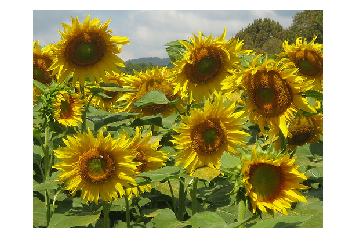

In [133]:
img_name = rng.choice(testing_images)    # random choose a file name
testing_image_path = testing_path + img_name
testing_img = scipy.misc.imread(testing_image_path)  # without flatten keyword, we can show color photo below

test_index = int(img_name.split('.')[0])
if pred[test_index] == 0:
    print "Predicted as Rose"
else:
    print "Predicted as Sunflower"

pylab.imshow(testing_img)
pylab.axis('off')
pylab.show()

# Here, the training data only contains 55 images for rose and sunflower, not too much training data

In [67]:
# Add more layers into CNN
## increase epochs
# validation accuracy doesn't improve

filters=25
filtersize1=(5,5)
filtersize2=(4,4)
epochs = 17
batchsize=128
input_shape=(100,100,3)
hidden_num_units = 50

model = Sequential()

model.add(keras.layers.InputLayer(input_shape=input_shape))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize1, strides=(1, 1), 
                                            padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize1, strides=(1, 1), 
                                            padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize2, strides=(1, 1), 
                                            padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=hidden_num_units, activation='relu'))
model.add(keras.layers.Dense(units=2, input_dim=55,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_image_temp, training_label, epochs=epochs, batch_size=batchsize,validation_split=0.3)

model.summary()

Train on 77 samples, validate on 33 samples
Epoch 1/17
77/77 [==============================] - 2s - loss: 7.5357 - acc: 0.3377 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/17
77/77 [==============================] - 2s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/17
77/77 [==============================] - 2s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/17
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/17
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/17
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/17
77/77 [==============================] - 1s - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 8/17
77/77 [==============================] - 1s - loss: 4.6052 - ac